In [1]:
import numpy as np
import math as mth
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import Boundary_Functions as bf
import timeit


from mpmath import *
from pynverse import inversefunc
from scipy.special import gamma as gamma
from scipy.special import gammaincc as gamma3
from mpmath import gammainc as gamma2

#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

In [2]:
rnp=np.load('rnp.npy')
signp=np.load('sig.npy')
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')
vrange=np.load('vrange.npy')


In [3]:
print(rnputil)

N=int(rnputil[0])
Nu=int(rnputil[1])
Nv=int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
umax=Nu/N
vmax=Nv/N

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0

rplus=M0+(M0**2-Q**2)**(0.5)
rminus=M0-(M0**2-Q**2)**(0.5)
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(17530)
if Q>0.0:
    predtime=numpoints/(204896)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[  5.00000000e+00   3.81500000e+03   5.00000000e+03   5.00000000e+00
   4.00000000e-01   1.00000000e+00   9.50000000e-01]
N=5
19075000 points
Runtime: about 1.55 minutes


In [4]:
if M0==0.0:
    rlist=np.zeros((Nu,Nv))
    dr0u=-1/(4*dr0v)

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=ru0+dr0u/N*i+dr0v/N*j


In [5]:
if M0>0.0 and Q==0.0:
    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan
    
    #rlistu=ru0+bf.dr2(M0,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    #print(rlistv)

    ulist=np.empty((Nu))
    vlist=np.empty((Nv))

    for i in range(0,Nu):
        if rlistu[i]>rminus:
            ulist[i]=bf.rbounschinv(M0,ru0,bf.dr2(M0,dr0v,ru0)*(bf.esig(M0,rlistu[0]))**(1),rlistu[i])
        else:
            ulist[i]=np.nan
    
    for j in range(0,Nv):
        vlist[j]=bf.rbounschinv(M0,ru0,dr0v*bf.esig(M0,rlistu[0])**(1),rlistv[j])

    #print(vlist)
    plt.plot(ulist)
    plt.show()

In [6]:
if M0>0.0 and Q==0.0:        
    rlist=np.zeros((Nu,Nv))*np.nan

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
            #if rlist[i][j]>0.0:
                #continue
            #else:
                    #rlistv[j]=np.nan
                #break
            

1.8592264486151873
[  5.00000000e+00   4.92048750e+00   4.84163581e+00 ...,   2.93589832e-03
  -5.01535168e-03  -1.29666017e-02]


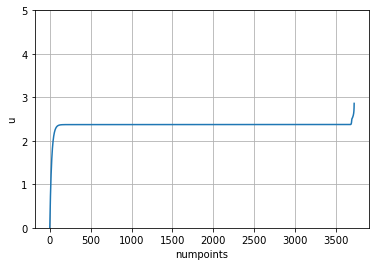

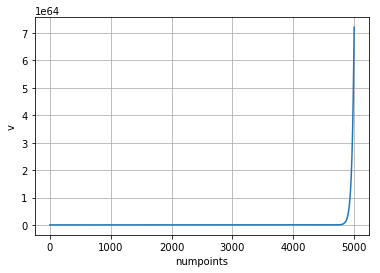

[ 0.          0.10559739  0.20650772 ...,         nan         nan
         nan]


In [7]:
if M0>0.0 and Q>0.0:
    #rlistu=ru0+bf.dr2rn(M0,Q,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    print(bf.esigrn(M0,Q,ru0))
    print(rlistu)

    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan

    for i in range(0,Nu):
        if rlistu[i]>rminus:
            ulist[i]=bf.rbounrninv(float(rlistu[i]),M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(1))
        else:
            ulist[i]=np.nan

    for i in range(0,Nv):
        vlist[i]=bf.rbounrninv(float(rlistv[i]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

    plt.plot(ulist)#,rlistu)
    plt.xlabel('numpoints')
    plt.ylabel('u')
    #plt.xlabel('u')
    #plt.ylabel('r')
    #plt.xlim(0,1)
    plt.ylim(0,5)
    plt.grid()
    plt.show()    
    
    plt.plot(vlist)#,rlistv)
    plt.xlabel('numpoints')
    plt.ylabel('v')
    #plt.xlabel('v')
    #plt.ylabel('r')
    #plt.xlim(0,1)
    #plt.ylim(4,5)
    plt.grid()
    plt.show()

    print(ulist)

In [8]:
if M0>0.0 and Q>0.0:
    rlist=np.zeros((Nu,Nv))*np.nan
    for i in range(0,Nu):
    #for j in range(0,Nv):
        rlist[i]=bf.rrn(M0,Q,ru0,dr0v,signp[i][0],ulist,vlist,i).reshape(Nv)

C:\Users\Brandon Piotrzkowski\OneDrive\Research\Summer 2017 Research\py codes\notebooks\Boundary_Functions.py:144: RuntimeWarning: invalid value encountered in power
  return 1/r**2*dr0*mth.exp(2*kplus*(ru0-r))*(r-rminus)**(1+kplus/kminus)*(ru0-rminus)**(-1-kplus/kminus)*ru0**2#*mth.exp(sig)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


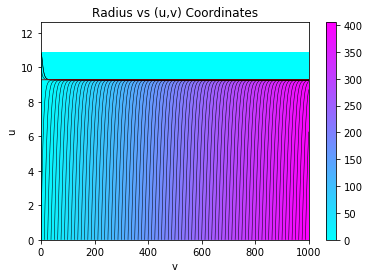

In [9]:
levels=np.arange(5.0, np.nanmax(rlist), 5.0 )
#levels=np.arange(5.0, 100, 5.0 )
levels=np.insert(levels,0,[rminus+.01,.7,1.0,rplus])

plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(rlist),cmap=plt.cm.cool,vmin=0.0,vmax=np.nanmax(rlist))
plot4=plt.contour(vrange,urange,rlist,levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rlist, [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rlist, [rminus],linewidths=1.0,linestyles='dashed',colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, levels,  
           #inline=0, inline_spacing=0, 
           #fmt='%1.2f',rightside_up=True,
           #fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
#plt.ylim(0,11)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()


3815


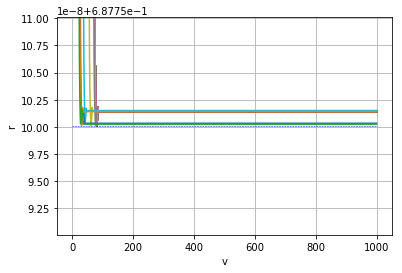

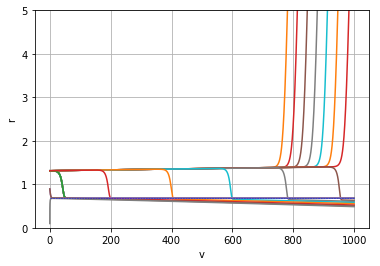

In [10]:
print(Nu)
Ni=2500
while Ni<Nu:
    plt.plot(vrange,rlist[Ni,:])
    Ni+=10
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5)
plt.ylim(rminus-0.00000001,rminus+0.00000001)
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()

Ni=2500
while Ni<Nu:
    plt.plot(vrange,rlist[Ni,:])
    plt.plot(vrange,rnp[Ni,:])
    #print(Ni)
    Ni+=100
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5)
#plt.ylim(rminus-0.1,rminus+0.1)
plt.xlabel('v')
plt.ylabel('r')
plt.ylim(0,5)
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


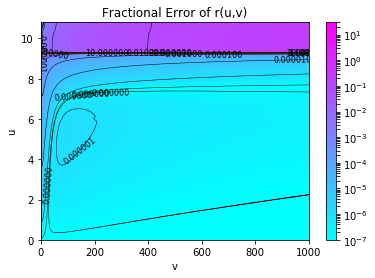

In [11]:
rdiff=np.ma.masked_invalid(abs((rlist-rnp)/rlist))


if M0==0.0:
    levelsdiff=[10**(-11.0),10**(-10.0),10**(-9.0)]
if M0>0.0 and Q==0.0:
    levelsdiff=[.00001,.0001,.001]
if M0>0.0 and Q>0.0:
    levelsdiff=[10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(-0),10**(1),20**(1),30**(1)]

plot1=plt.pcolormesh(vrange,urange,rdiff,cmap=plt.cm.cool, norm=colors.LogNorm(vmin=min(levelsdiff), vmax=max(levelsdiff)))#,vmin=0.0,vmax=.0001)
#plt.ylim(0,10.8)
plot4=plt.contour(vrange,urange,rdiff, levelsdiff,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rlist, [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rnp, [rplus],linewidths=0.5,colors='green',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rlist, [rminus],linewidths=1.0,linestyles='dashed',colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#fmt={str(10**(-2)):10**(-2)}
plt.clabel(plot4, levelsdiff,  
           inline=0, inline_spacing=0, 
           fmt='%1.6f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,vmax)
#plt.ylim(9.27585,9.27615) #normal
#plt.ylim(9.27589,9.27591)
plt.ylim(0,10.8)
plt.colorbar(plot1)
plt.title('Fractional Error of r(u,v)')
#plt.savefig('EH-mismatch-dblNv.png',dpi=300)
plt.show()

Max error is: 546.44323035
Mean error is: 68.8690224155
Standard Deviation is: 117.782617413


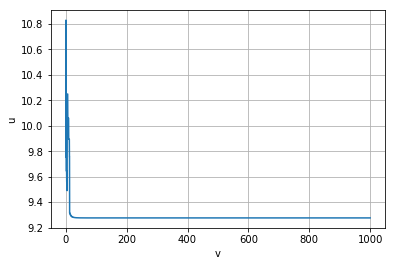

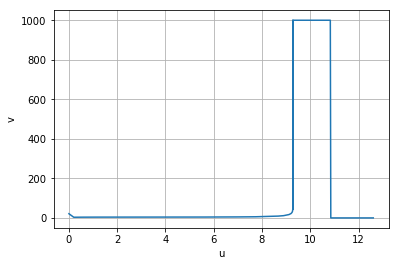

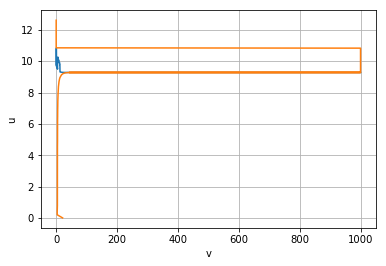

In [12]:
print("Max error is: "+str(np.nanmax(rdiff)))
print("Mean error is: "+str(np.nanmean(rdiff)))
print("Standard Deviation is: "+str(np.nanstd(rdiff)))
plt.plot(vrange,urange[np.argmax(rdiff,axis=0)])
plt.xlabel('v')
plt.ylabel('u')
plt.grid()
plt.show()
plt.plot(urange,vrange[np.argmax(rdiff,axis=1)])
plt.xlabel('u')
plt.ylabel('v')
plt.grid()
plt.show()

plt.plot(vrange,urange[np.argmax(rdiff,axis=0)])
plt.plot(vrange[np.argmax(rdiff,axis=1)],urange)
plt.xlabel('v')
plt.ylabel('u')
plt.grid()
plt.show()
#print(rlist[570,570])

#print(rdiff)

In [13]:
stop = timeit.default_timer()

In [14]:
acttime=stop - start

print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str((numpoints)/(stop - start))+' points per second') 

exttime=format((acttime-predtime)/60,'.2f')

print("Took "+str(exttime)+" more minutes")

116.76904200446464 seconds
1.9461507000744107 minutes
0.03243584500124018 hours
163356.65406307497 points per second
Took 0.39 more minutes


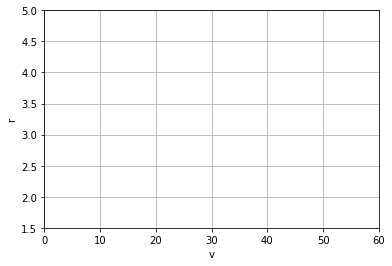

In [15]:
plt.plot(vrange,rlist[300,:])
plt.ylim(1.5,5)
plt.xlim(0,60)
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()



In [16]:
print(Nu)
urange2=[]
for i in range(0,Nu-1):
    urange2.append(urange[i+1]-urange[i])
print(np.argmin(urange2))
print(urange[np.argmin(urange2)])

3815
741
9.27655314976


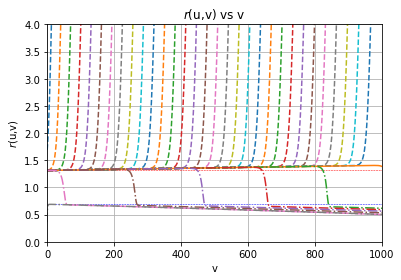

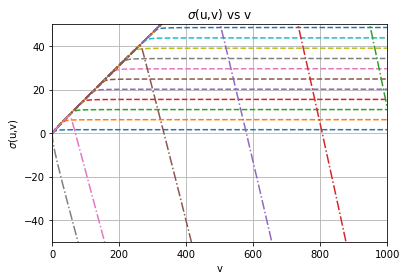

In [33]:
#uNEH=Nu-10
#ustep=1
#uN1=uNEH#uNEH-3000
uNEH=3167
ustep=100
uN1=uNEH-3100
Numax=Nu


uN=uN1
plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'--',label='u='+str(urange[uN]))
    if uN==uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],label='u='+str(urange[uN]))
    if uN>uNEH:
        sample3=plt.plot(vrange,rnp[uN,:],'-.',label='u='+str(urange[uN]))
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$r$(u,v)')
plt.ylim(0,4)
#plt.xscale('log')
#plt.yscale('log')
#plt.legend()
plt.grid()
plt.title(r'$r$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('rEH-RN.png',dpi=300,bbox_inches="tight")
plt.show()

uN=uN1
while uN< Numax:
    if uN<uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'--',label='u='+str(uN))
    if uN==uNEH:
        sample3=plt.plot(vrange,signp[uN,:])
    if uN>uNEH:
        sample3=plt.plot(vrange,signp[uN,:],'-.')
    #sample3=plt.plot(vrange,signp[uN1+uN,:])
    uN+=ustep
plt.xlim(0,vmax)
plt.xlabel('v')
plt.ylabel(r'$\sigma$(u,v)')
plt.ylim(-50,50)
#plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.title(r'$\sigma$(u,v) vs v') #(u='+str(uN2u)+')')#+',uEH='+str(uEH*umax)+')')
#plt.savefig('sigEH-RN.png',dpi=300,bbox_inches="tight")
plt.show()

In [34]:
for j in range(0,Nv):
    print(rnp[3300,j])

1.3119903384
1.31202208726
1.31205368013
1.31208511946
1.31211640773
1.31214754748
1.31217854125
1.31220939159
1.31224010103
1.31227067211
1.31230110735
1.31233140922
1.3123615802
1.31239162272
1.31242153917
1.3124513319
1.31248100324
1.31251055545
1.31253999079
1.31256931143
1.31259851952
1.31262761716
1.31265660641
1.31268548929
1.31271426777
1.31274294376
1.31277151916
1.3127999958
1.31282837547
1.31285665993
1.31288485091
1.31291295006
1.31294095902
1.31296887939
1.31299671274
1.31302446056
1.31305212437
1.31307970559
1.31310720565
1.31313462593
1.31316196778
1.31318923251
1.31321642142
1.31324353575
1.31327057673
1.31329754557
1.31332444342
1.31335127144
1.31337803074
1.31340472241
1.31343134752
1.31345790711
1.31348440219
1.31351083376
1.3135372028
1.31356351026
1.31358975706
1.31361594412
1.31364207233
1.31366814256
1.31369415566
1.31372011246
1.31374601378
1.31377186042
1.31379765316
1.31382339277
1.31384907999
1.31387471556
1.31390030021
1.31392583463
1.31395131951
1.313976755

1.35626941999
1.35628784801
1.35630627564
1.35632470275
1.35634312939
1.35636155554
1.35637998124
1.35639840641
1.3564168311
1.35643525528
1.35645367894
1.35647210222
1.35649052491
1.35650894713
1.35652736888
1.3565457902
1.35656421095
1.35658263135
1.35660105113
1.3566194704
1.35663788924
1.35665630762
1.35667472553
1.35669314289
1.35671155978
1.35672997629
1.3567483923
1.35676680773
1.3567852228
1.35680363732
1.35682205138
1.3568404649
1.35685887792
1.3568772905
1.35689570267
1.35691411423
1.35693252531
1.35695093584
1.35696934604
1.35698775566
1.3570061648
1.35702457353
1.35704298176
1.35706138954
1.35707979686
1.35709820372
1.35711661008
1.35713501601
1.35715342145
1.35717182636
1.35719023064
1.35720863469
1.35722703808
1.35724544105
1.35726384352
1.3572822455
1.35730064713
1.3573190481
1.35733744867
1.35735584885
1.35737424846
1.35739264762
1.35741104641
1.35742944472
1.35744784244
1.3574662397
1.35748463651
1.35750303293
1.35752142871
1.3575398241
1.357558219
1.3575766135
1.35759